<a href="https://colab.research.google.com/github/Poojashrees3/Statistics-and-machine-learning/blob/main/exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Handling missing values**

In [3]:
# Checking for missing values
print(iris.isnull().sum())

#there are no missing values found

#if found we can use the below formula

# Impute missing values using the mean for numerical columns
#for col in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
 #   if iris[col].isnull().any():
  #      iris[col] = iris[col].fillna(iris[col].mean())


# Verifying that there are no more missing values
#print(iris.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


**Scaling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create instances of StandardScaler and MinMaxScaler
scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# Select numerical features for scaling
numerical_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Z-score scaling
iris_scaled = iris.copy()  # Create a copy to avoid modifying the original DataFrame
iris_scaled[numerical_features] = scaler.fit_transform(iris[numerical_features])

# Min-Max scaling
iris_normalized = iris.copy()  # Create a copy to avoid modifying the original DataFrame
iris_normalized[numerical_features] = min_max_scaler.fit_transform(iris[numerical_features])

# Now, iris_scaled contains the standardized data, and iris_normalized has the normalized data
print("\n iris scaled data : \n ",iris_scaled.head())
print("\n iris normalized data: \n ",iris_normalized.head())


 iris scaled data : 
     sepal_length  sepal_width  petal_length  petal_width species
0     -0.900681     1.019004     -1.340227    -1.315444  setosa
1     -1.143017    -0.131979     -1.340227    -1.315444  setosa
2     -1.385353     0.328414     -1.397064    -1.315444  setosa
3     -1.506521     0.098217     -1.283389    -1.315444  setosa
4     -1.021849     1.249201     -1.340227    -1.315444  setosa

 iris normalized data: 
     sepal_length  sepal_width  petal_length  petal_width species
0      0.222222     0.625000      0.067797     0.041667  setosa
1      0.166667     0.416667      0.067797     0.041667  setosa
2      0.111111     0.500000      0.050847     0.041667  setosa
3      0.083333     0.458333      0.084746     0.041667  setosa
4      0.194444     0.666667      0.067797     0.041667  setosa


**Generating Noise**

In [ ]:
# Injecting random noise into 'sepal_length'
np.random.seed(42)
noise = np.random.normal(0, 0.5, len(iris))  # Mean 0, std dev 0.5
iris['noisy_sepal_length'] = iris['sepal_length'] + noise

# Smoothing with Exponential Moving Average
alpha = 0.2
iris['ema_sepal_length'] = iris['noisy_sepal_length'].ewm(alpha=alpha, adjust=False).mean()

# Remove Noise using rolling mean (example)
iris['rolling_mean_sepal_length'] = iris['noisy_sepal_length'].rolling(3,center=True).mean()


print(iris[['sepal_length', 'noisy_sepal_length', 'ema_sepal_length','rolling_mean_sepal_length']].head(10))

   sepal_length  noisy_sepal_length  ema_sepal_length  \
0           5.1            5.348357          5.348357   
1           4.9            4.830868          5.244859   
2           4.7            5.023844          5.200656   
3           4.6            5.361515          5.232828   
4           5.0            4.882923          5.162847   
5           5.4            5.282932          5.186864   
6           4.6            5.389606          5.227412   
7           5.0            5.383717          5.258673   
8           4.4            4.165263          5.039991   
9           4.9            5.171280          5.066249   

   rolling_mean_sepal_length  
0                        NaN  
1                   5.067690  
2                   5.072076  
3                   5.089428  
4                   5.175790  
5                   5.185154  
6                   5.352085  
7                   4.979529  
8                   4.906753  
9                   4.834945  


**Handling Outliers**

In [ ]:
def handle_outliers_zscore(df, column, threshold=5):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    df_outliers_removed = df[(z_scores < threshold)]
    return df_outliers_removed

# Example usage for 'noisy_sepal_length'
iris_no_outliers = handle_outliers_zscore(iris, 'noisy_sepal_length')

# Now, iris_no_outliers contains the DataFrame with outliers removed based on Z-score
print("\nDataFrame with outliers removed based on Z-score:")
print(iris_no_outliers.head())


DataFrame with outliers removed based on Z-score:
   sepal_length  sepal_width  petal_length  petal_width species  \
0           5.1          3.5           1.4          0.2  setosa   
1           4.9          3.0           1.4          0.2  setosa   
2           4.7          3.2           1.3          0.2  setosa   
3           4.6          3.1           1.5          0.2  setosa   
4           5.0          3.6           1.4          0.2  setosa   

   noisy_sepal_length  ema_sepal_length  rolling_mean_sepal_length  
0            5.348357          5.348357                        NaN  
1            4.830868          5.244859                   5.067690  
2            5.023844          5.200656                   5.072076  
3            5.361515          5.232828                   5.089428  
4            4.882923          5.162847                   5.175790  


**Filter Method-Correlation(heat map)**

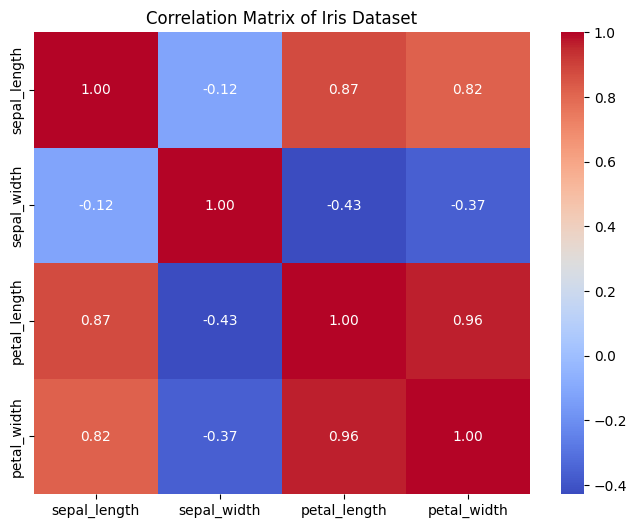

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the correlation matrix for numeric features only

numeric_features = iris.select_dtypes(include=['number']).columns # Select numeric columns

correlation_matrix = iris[numeric_features].corr() # Calculate correlation for numeric features


# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Iris Dataset')
plt.show()

The above map reflects -

1.Petal length and petal width show a very strong positive correlation (0.96). This suggests that as petal length increases, petal width tends to increase as well.

2.Sepal length and sepal width exhibit a weak correlation (0.11).

3.The heatmap reveals the relationships between the different iris measurements.  Petal dimensions are highly correlated, sepal dimensions less so, and there are moderate correlations between petal and sepal dimensions. The noisy sepal length doesn't significantly alter the overall correlation pattern due to its moderate level of noise.  The smoothing techniques applied to the noisy data help to preserve the general relationships with the original measurements.

**Wrapper Methods - RFE**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Feature ranking:
 [3 1 2 1]
Selected features: Index(['sepal_width', 'petal_width'], dtype='object')


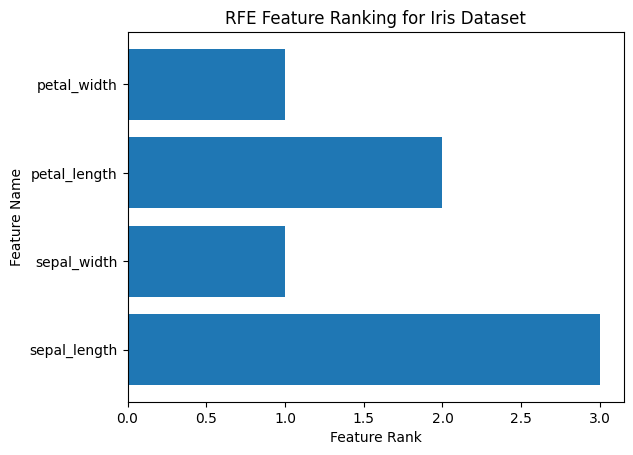

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Prepare the data
X = iris.drop("species", axis=1)  # Features
y = iris["species"]  # Target variable

# Create and train the RFE model
model = LogisticRegression(solver='liblinear', multi_class='auto')
rfe = RFE(estimator=model, n_features_to_select=2)  # Select the top 2 features
rfe = rfe.fit(X, y)

# Get the feature ranking
ranking = rfe.ranking_
print("Feature ranking:\n", ranking)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)

# Plotting
# Assuming your features are sepal_length, sepal_width, petal_length, petal_width
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.barh(feature_names, ranking)
plt.xlabel("Feature Rank")
plt.ylabel("Feature Name")
plt.title("RFE Feature Ranking for Iris Dataset")
plt.show()

**Embedded Methods - Lasso Regression**

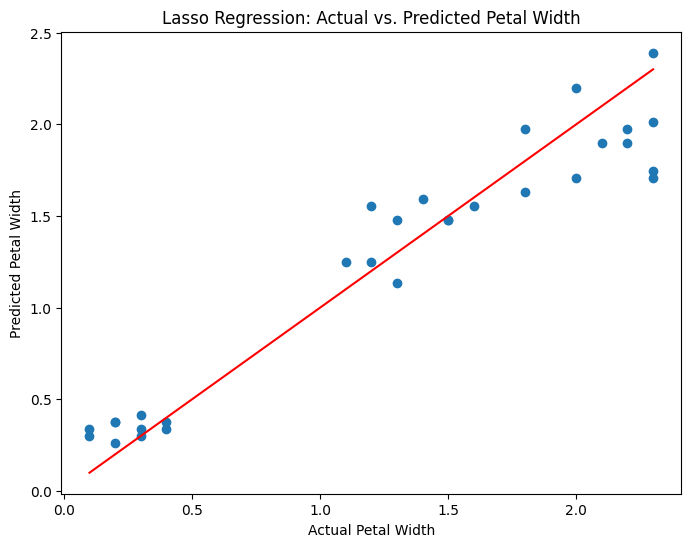

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Prepare the data
X = iris[['sepal_length', 'sepal_width', 'petal_length']]
y = iris['petal_width']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Making predictions
y_pred = lasso.predict(X_test)


# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Petal Width")
plt.ylabel("Predicted Petal Width")
plt.title("Lasso Regression: Actual vs. Predicted Petal Width")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Add a diagonal line for reference
plt.show()
